

# Project: Exploring the impact of certain economic metrics on Life expectancy between 2000 and 2019 - [Gapminder World]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This analysis is based on data from Gapminder World.  Gapminder world has a collection of information about people in different countries accross the years. The four indicators considered in this project are Population, Life expectancy, Sustainable Development Index and Human Development Index.


### Question(s) for Analysis

1. What is the correlation between Human Development Index(hdi) and Sustainable Development  index(sdi)?
2. Which countries have the highest Life expectancy?
3. Does Sustainable Development Index have any impact life expectancy?
4. In the last 10 years has there been and improvement or decline in the Sustainable              Development Index?
5. In Nigeria, how has the Human Development Index faired over the years?
6. Which countries have the highest and lowest Life expectancy?
7. Which countries have the lowest Human Development Index

In [17]:
#Import statements for all packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


In [18]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)",)': /simple/pandas/
Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [19]:
#Upgrade seaborn to use sns.lineplot
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


<a id='wrangling'></a>
## Data Wrangling

In [20]:
# Load population dataset
population_df = pd.read_csv('population_total.csv')
population_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [21]:
#Load Life expectancy dataset
life_expectancy_df = pd.read_csv('life_expectancy_years.csv')
life_expectancy_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [22]:
#Load Human Development Index dataset
hdi_df = pd.read_csv('hdi_human_development_index.csv')
hdi_df.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,0.344,...,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
2,Albania,0.650,0.631,0.615,0.618,0.624,0.637,0.646,0.645,0.655,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,United Arab Emirates,0.723,0.735,0.738,0.745,0.755,0.764,0.765,0.766,0.769,...,0.820,0.826,0.832,0.838,0.847,0.859,0.864,0.881,0.889,0.890


In [23]:
#Load Sustainable Development Index dataset
sdi_df = pd.read_csv('sdi.csv')
sdi_df.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,32.5,33.1,34.0,33.5,33.0,35.6,36.0,36.6,37.1,...,50.8,51.4,52.7,53.4,53.8,53.8,54.1,54.5,54.9,55.1
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.8,57.4,58.6,59.8,60.8,61.6,62.2,62.7,62.7,62.6
2,Albania,69.9,68.0,66.2,66.5,67.2,68.6,69.5,69.5,70.6,...,79.6,81.1,82.2,82.6,82.6,82.3,82.1,82.1,82.3,82.6
3,United Arab Emirates,46.9,29.2,19.4,12.8,10.6,11.1,9.9,10.2,10.7,...,14.7,13.6,13.2,11.9,11.5,11.0,10.8,10.9,11.0,11.0
4,Argentina,77.1,77.1,77.1,77.5,77.4,77.8,78.0,78.3,78.0,...,81.6,80.6,80.3,78.7,78.2,77.6,77.2,77.2,77.2,77.7



### Data Cleaning
 

In [24]:
#find the shape of the dataset
population_df.shape

(197, 302)

In [25]:
life_expectancy_df.shape

(195, 302)

In [26]:
hdi_df.shape

(189, 31)

In [27]:
sdi_df.shape

(164, 31)

It is clear from the above, that the different datasets are spread across different ranges. For a proper comparison, I will liimt my analysis to 20 years(2000-2019) and drop the other columns.

In [38]:
population_df = population_df.melt(id_vars=["country"],
                var_name="year",
                value_name="population")
population_df

,country,year,population
0,Afghanistan,year,1800
1,Angola,year,1800
2,Albania,year,1800
3,Andorra,year,1800
4,United Arab Emirates,year,1800
5,Argentina,year,1800
6,Armenia,year,1800
7,Antigua and Barbuda,year,1800
8,Australia,year,1800
9,Austria,year,1800


In [29]:
life_expectancy_df = life_expectancy_df.melt(id_vars=["country"],
                     var_name="year",
                     value_name="life_expectancy")  
life_expectancy_df                                             

,country,year,life_expectancy
0,Afghanistan,1800,28.2
1,Angola,1800,27.0
2,Albania,1800,35.4
3,Andorra,1800,NaN
4,United Arab Emirates,1800,30.7
5,Argentina,1800,33.2
6,Armenia,1800,34.0
7,Antigua and Barbuda,1800,33.5
8,Australia,1800,34.0
9,Austria,1800,34.4


In [30]:
hdi_df = hdi_df.melt(id_vars=["country"],
                     var_name="year",
                     value_name="hdi")   
hdi_df                     

,country,year,hdi
0,Afghanistan,1990,0.302
1,Angola,1990,NaN
2,Albania,1990,0.650
3,Andorra,1990,NaN
4,United Arab Emirates,1990,0.723
5,Argentina,1990,0.718
6,Armenia,1990,0.654
7,Antigua and Barbuda,1990,NaN
8,Australia,1990,0.871
9,Austria,1990,0.803


In [31]:
sdi_df = sdi_df.melt(id_vars=["country"],
                     var_name="year",
                     value_name="sdi")   
sdi_df                     

,country,year,sdi
0,Afghanistan,1990,32.5
1,Angola,1990,NaN
2,Albania,1990,69.9
3,United Arab Emirates,1990,46.9
4,Argentina,1990,77.1
5,Armenia,1990,NaN
6,Antigua and Barbuda,1990,NaN
7,Australia,1990,33.6
8,Austria,1990,68.0
9,Azerbaijan,1990,NaN


All the tables have now been transformed to show the indicator against the identifier variables - year and country. Below these table will be merged into one and unwanted rows dropped. It is important to note that the dropping of unwanted rows has not be carried out yet to avoid repetion of code across the 4 datasets. 

In [32]:
df=pd.merge(pd.merge(population_df, life_expectancy_df, on=['country','year']),pd.merge(hdi_df,sdi_df, on=['country','year']))
df

,country,year,population,life_expectancy,hdi,sdi
0,Afghanistan,1990,12.4M,53.8,0.302,32.5
1,Angola,1990,11.8M,49.7,NaN,NaN
2,Albania,1990,3.29M,72.8,0.650,69.9
3,United Arab Emirates,1990,1.83M,68.7,0.723,46.9
4,Argentina,1990,32.6M,72.5,0.718,77.1
5,Armenia,1990,3.54M,70.6,0.654,NaN
6,Antigua and Barbuda,1990,62.5k,74.0,NaN,NaN
7,Australia,1990,17M,77.0,0.871,33.6
8,Austria,1990,7.72M,76.0,0.803,68.0
9,Azerbaijan,1990,7.24M,66.9,NaN,NaN


In [37]:
df.dtypes

country             object
year                object
population          object
life_expectancy    float64
hdi                float64
sdi                float64
dtype: object

In [39]:
#Changed the year column to datetime function in order to be able to drop columns
pd.to_datetime(df['year'])

0      1990-01-01
1      1990-01-01
2      1990-01-01
3      1990-01-01
4      1990-01-01
          ...    
4915   2019-01-01
4916   2019-01-01
4917   2019-01-01
4918   2019-01-01
4919   2019-01-01
Name: year, Length: 4920, dtype: datetime64[ns]

In [40]:
df_new = df.drop(index = df[df['year']< '2000'].index)
df_new.head()

,country,year,population,life_expectancy,hdi,sdi
1640,Afghanistan,2000,20.8M,54.7,0.350,37.7
1641,Angola,2000,16.4M,52.8,0.400,43.1
1642,Albania,2000,3.13M,75.4,0.671,72.3
1643,United Arab Emirates,2000,3.13M,69.1,0.782,10.5
1644,Argentina,2000,36.9M,74.2,0.781,80.3


In [42]:
#Drop population column. 
#At this point I could no longer proceed with this column due to the string format. 
#I attempted to use the str.replace function to replace k,M and B with zeros but the difference in the round up of decimal places gave some wrong figures.
df_new = df_new.drop(['population'], axis=1)
df_new.head()

,country,year,life_expectancy,hdi,sdi
1640,Afghanistan,2000,54.7,0.350,37.7
1641,Angola,2000,52.8,0.400,43.1
1642,Albania,2000,75.4,0.671,72.3
1643,United Arab Emirates,2000,69.1,0.782,10.5
1644,Argentina,2000,74.2,0.781,80.3


In [43]:
#drop all nulls
df_new.dropna(inplace=True)

In [44]:
#Check info again to confirm nulls have been dropped
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3225 entries, 1640 to 4919
Data columns (total 5 columns):
country            3225 non-null object
year               3225 non-null object
life_expectancy    3225 non-null float64
hdi                3225 non-null float64
sdi                3225 non-null float64
dtypes: float64(3), object(2)
memory usage: 151.2+ KB


In [45]:
#Check for any duplicates
df_new.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What are the properties of the dataset?)

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

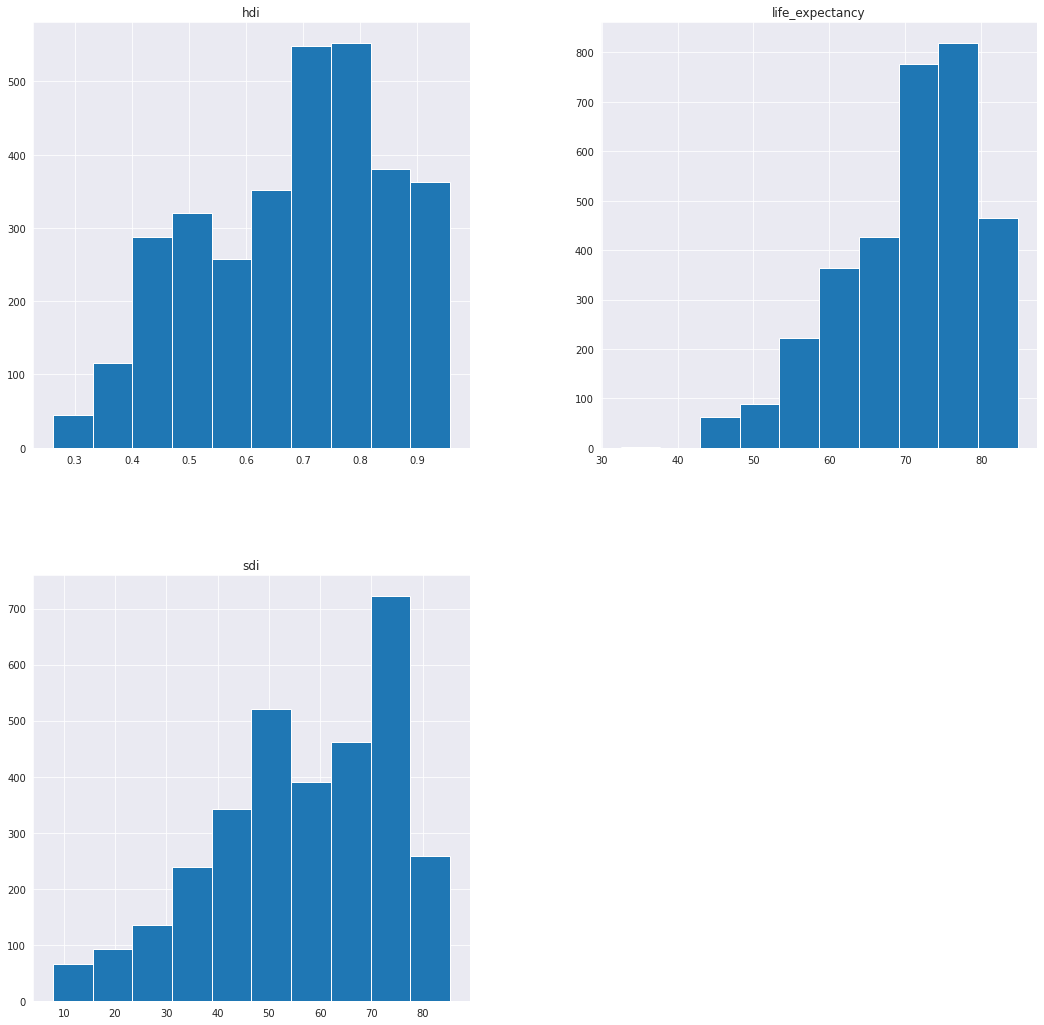

In [46]:
df_new.hist(figsize = (18,18));

### Research Question 2  (What are the top 5 countries with the average highest life expectancy?)

Text(0, 0.5, 'life_expectancy')

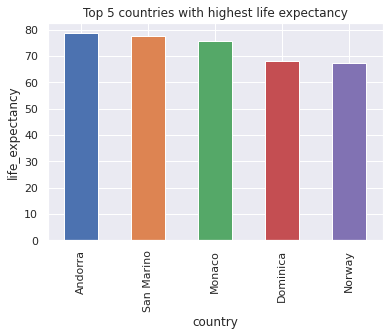

In [153]:

df_viz = life_expectancy_df.groupby('country')['life_expectancy'].mean().sort_values(ascending=False).head().plot(kind = 'bar')
plt.title('Top 5 countries with highest life expectancy', fontsize = 12)
plt.xlabel('country')
plt.ylabel('life_expectancy')

### Research Question 3  (Does the sustainable development index have any impact on life expectancy?)

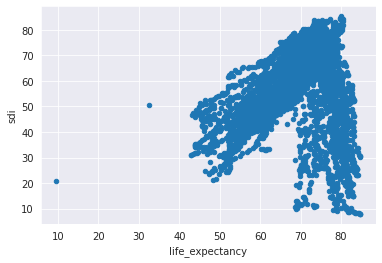

In [26]:
df.plot(x='life_expectancy',y='sdi',kind='scatter');

There is no propoortional relationship between SDI and Life expectancy. From the graph we can see that even places with a low sustainable development index have a high life expectancy.

### Research Question 4  (Which years have recorded the average highest sustainable development index across all countries?)

Text(0, 0.5, 'year')

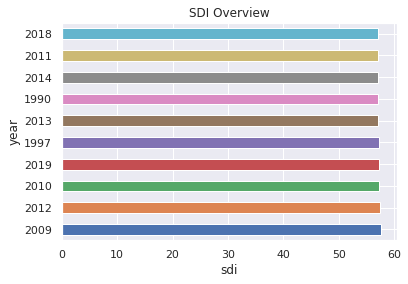

In [150]:
df_viz = sdi_df.groupby('year')['sdi'].mean().sort_values(ascending=False).head(10).plot(kind = 'barh')
plt.title('SDI Top 10', fontsize = 12)
plt.xlabel('sdi')
plt.ylabel('year')

### Research Question 5  (Compare life expectancy of Nigeria to Brazil)

For this question I compared with Brazil because Nigeria and Brazil are in the same population bracket.

Text(0.5, 1.0, 'Life expectancy NGA vs BRA')

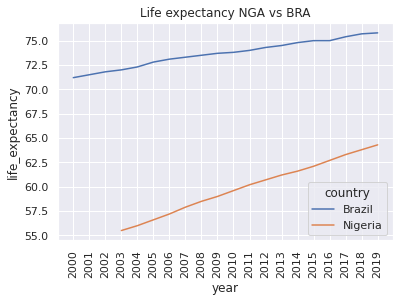

In [162]:
sns.set()
df_subset = df_new.loc[df_new['country'].isin(['Nigeria','Brazil'])]
sns.lineplot(x='year',y='life_expectancy',hue='country',data=df_subset);
plt.xticks(rotation=90)
plt.title('Life expectancy NGA vs BRA')



### Research Question 6  (Which countries have the highest and lowest life expectancy?)

In [140]:
#Define a function for maximum and minimum values to avoid repition
def maxmin_val(x):
    max_val = df_new[df_new[x]==df_new[x].max()].index
    min_val = df_new[df_new[x]==df_new[x].min()].index
    return max_val, min_val

In [142]:
maxmin_val('life_expectancy')

(Int64Index([4669, 4833, 4886], dtype='int64'),
 Int64Index([3345], dtype='int64'))

In [149]:
print('The countries with the highest life expectancy are -',df.loc[4669,:]['country'],df.loc[4833,:]['country'],df.loc[4886,:]['country'])
print('The country with the lowest life expectancy is -',df.loc[3345,:]['country'])
#I suppose Japan printed twice because it had the same value in different years. 

The countries with the highest life expectancy are - Japan Japan Singapore
The country with the lowest life expectancy is - Haiti


### Research Question 7  (Which countries have the highest and lowest Human Development Index(HDI)?

In [146]:
maxmin_val('hdi')

(Int64Index([4868], dtype='int64'), Int64Index([1748], dtype='int64'))

In [148]:
print('The country with the highest Human Development Index is -',df.loc[4868,:]['country'])
print('The countries with the lowest Human Development Index is  -',df.loc[1748,:]['country'])


The country with the highest Human Development Index is - Norway
The countries with the lowest Human Development Index is  - Niger


<a id='conclusions'></a>
## Conclusions

1. From the analysis we see that the a high number of countries have HDI between 0.7 and 0.8.    Life expectancy is mostly between 70 and 80. A high number of countries have SDI value        between 70 and 80.
2. Andorra is the country with the highest average life expectancy. 
3. Sustainable Development Index of a country may impact many things but from this analysis      we cannot see any proportinal increase between SDI and life expectancy. From the graph we can see that even places with a low sustainable development index have a high life expectancy.
4. The year with the highest average sustainable index is 2018. From the analysis we can see      there is no proportional increase across the years. From this we can see that countries still have a lot to work on in other to improve the eco system. 
5. Over the years there has been a steady increase in Nigeria's life expectancy but, the          country is still has a long way to go compared to Brazil a country with about the same        population as Nigeria.
6. Two countries have the highest life expectancy rate - Japan and Singapore - Haiti has the      lowest Life expectancy rate. While Japan and Singapore have recored the highest life          expectancy rate at some point between 2000 and 2019 on an average, neither of them fall        within the top 5 average rates.
7. The countries with the highest and lowest Human Development Index 
   are Norway and Niger Repulic respectively.  

## Limitations

1. In some columns like population and income, the zeros for thousands, millions and billions where replaced by k,M and B while these would be have easy to replace using str.replace, the        decimal points differed all across making it impossible to use.


In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0